In [154]:
import os
from Agent import Agent
from itertools import chain
from PIL import Image
import numpy as np
from plotResult import plotOptimalThresh, plotTest_IOU, plotLoss_IOU



import importlib
import plotResult
importlib.reload(plotResult)

import Agent
importlib.reload(Agent)



<module 'Agent' from '/Users/jiten/Masters/WorkPlace/MRI Fractures Project/MyCode/Agent.py'>

In [29]:
# initialize the parameters

my_path = "/Users/jiten/Masters/WorkPlace/"
folder_path = os.getcwd() #"/Users/jiten/Masters/WorkPlace/MRI Fractures Project/"

folder_path = os.path.dirname(folder_path)

print(folder_path)

#source_folder = os.path.join(folder_path, 'SAGT1_Images')
train_dir_SAGT1 = os.path.join(folder_path, "train_data_SAGT1")
test_dir_SAGT1 = os.path.join(folder_path, "test_data_SAGT1")
    
train_dir_dict = {}
test_dir_dict ={}
val_dir_dict ={}

#val_dir = os.path.join(folder_path, "validate")
train_dir_SAGT1 = os.path.join(folder_path, "train_data_SAGT1")
test_dir_SAGT1 = os.path.join(folder_path, "test_data_SAGT1")
val_dir_SAGT1 = os.path.join(folder_path, "val_data_SAGT1")

train_dir_SAGIR = os.path.join(folder_path, "train_data_SAGIR")
test_dir_SAGIR = os.path.join(folder_path, "test_data_SAGIR")
val_dir_SAGIR = os.path.join(folder_path, "val_data_SAGIR")

train_dir_dict['SAGT1'] = train_dir_SAGT1
train_dir_dict['SAGIR'] = train_dir_SAGIR

test_dir_dict['SAGT1'] = test_dir_SAGT1
test_dir_dict['SAGIR'] = test_dir_SAGIR

val_dir_dict['SAGT1'] = val_dir_SAGT1
val_dir_dict['SAGIR'] = val_dir_SAGIR

# create the data structure for mask directories
train_mask_dir_dict = {}
test_mask_dir_dict = {}
val_mask_dir_dict = {}

train_mask_dir_SAGT1 = os.path.join(folder_path, "train_mask_SAGT1")
test_mask_dir_SAGT1 = os.path.join(folder_path, "test_mask_SAGT1")
val_mask_dir_SAGT1 = os.path.join(folder_path, "val_mask_SAGT1")

train_mask_dir_SAGIR = os.path.join(folder_path, "train_mask_SAGIR")
test_mask_dir_SAGIR = os.path.join(folder_path, "test_mask_SAGIR")
val_mask_dir_SAGIR = os.path.join(folder_path, "val_mask_SAGIR")

train_mask_dir_dict['SAGT1'] = train_mask_dir_SAGT1
train_mask_dir_dict['SAGIR'] = train_mask_dir_SAGIR

test_mask_dir_dict['SAGT1'] = test_mask_dir_SAGT1
test_mask_dir_dict['SAGIR'] = test_mask_dir_SAGIR

val_mask_dir_dict['SAGT1'] = val_mask_dir_SAGT1
val_mask_dir_dict['SAGIR'] = val_mask_dir_SAGIR

/Users/jiten/Masters/WorkPlace/MRI Fractures Project


In [30]:
img = 'SAGIR'
train_flag = True
#train_flag = False

# train_dir = train_dir_dict[img]
# mask_dir = train_mask_dir_dict[img]

# val_dir = val_dir_dict[img]
# mask_dir_val = val_mask_dir_dict[img]

# test_dir = test_dir_dict[img]
# mask_dir_test = test_mask_dir_dict[img]

In [31]:
# initialize the directory and get the model
if train_flag:
    train_dir = train_dir_dict[img]
    mask_dir = train_mask_dir_dict[img]

    val_dir = val_dir_dict[img]
    mask_dir_val = val_mask_dir_dict[img]

    # initialize agent
    agent = Agent.Agent(train_flag,img_dir=train_dir,msk_dir=mask_dir,folder_path=folder_path, val_dir=val_dir, msk_dir_val=mask_dir_val, 
                  state='new', num_epochs=200, batchSize=30, bilinear=False)
    agent.initializeUnet()

     # load custom dataset
    train_loader, val_loader = agent.loadCustomData()
        

mps
Initialize Custom Data
Train flag:: True
loader root directory:: /Users/jiten/Masters/WorkPlace/MRI Fractures Project/train_data_SAGIR
Total Size ::: 559
Initialize Custom Data
Total Size val::: 116


In [32]:
# run the model and get the predictions
if train_flag:
    # run the model
    loss_df, prediction_batch, iou_sore_df, loss_val_df, iou_score_val_df, prediction_batch_val = agent.runModel(train_loader, val_loader)

Epoch [1/200], Train( Loss: 0.2554, IoU_score: 0.0533 ) ::: Validation ( Loss: 0.2481, IoU_score: 0.0454 )
Epoch [2/200], Train( Loss: 0.2172, IoU_score: 0.0537 ) ::: Validation ( Loss: 0.1878, IoU_score: 0.0454 )
Epoch [3/200], Train( Loss: 0.1926, IoU_score: 0.0537 ) ::: Validation ( Loss: 0.1789, IoU_score: 0.0451 )
Epoch [4/200], Train( Loss: 0.1726, IoU_score: 0.0537 ) ::: Validation ( Loss: 0.1543, IoU_score: 0.0458 )
Epoch [5/200], Train( Loss: 0.1558, IoU_score: 0.0538 ) ::: Validation ( Loss: 0.1498, IoU_score: 0.0458 )
Epoch [6/200], Train( Loss: 0.1413, IoU_score: 0.0543 ) ::: Validation ( Loss: 0.1325, IoU_score: 0.0477 )
Epoch [7/200], Train( Loss: 0.1278, IoU_score: 0.0559 ) ::: Validation ( Loss: 0.1238, IoU_score: 0.0492 )
Epoch [8/200], Train( Loss: 0.1152, IoU_score: 0.0673 ) ::: Validation ( Loss: 0.1237, IoU_score: 0.0653 )
Epoch [9/200], Train( Loss: 0.1037, IoU_score: 0.0827 ) ::: Validation ( Loss: 0.1156, IoU_score: 0.0734 )
Epoch [10/200], Train( Loss: 0.0929, 

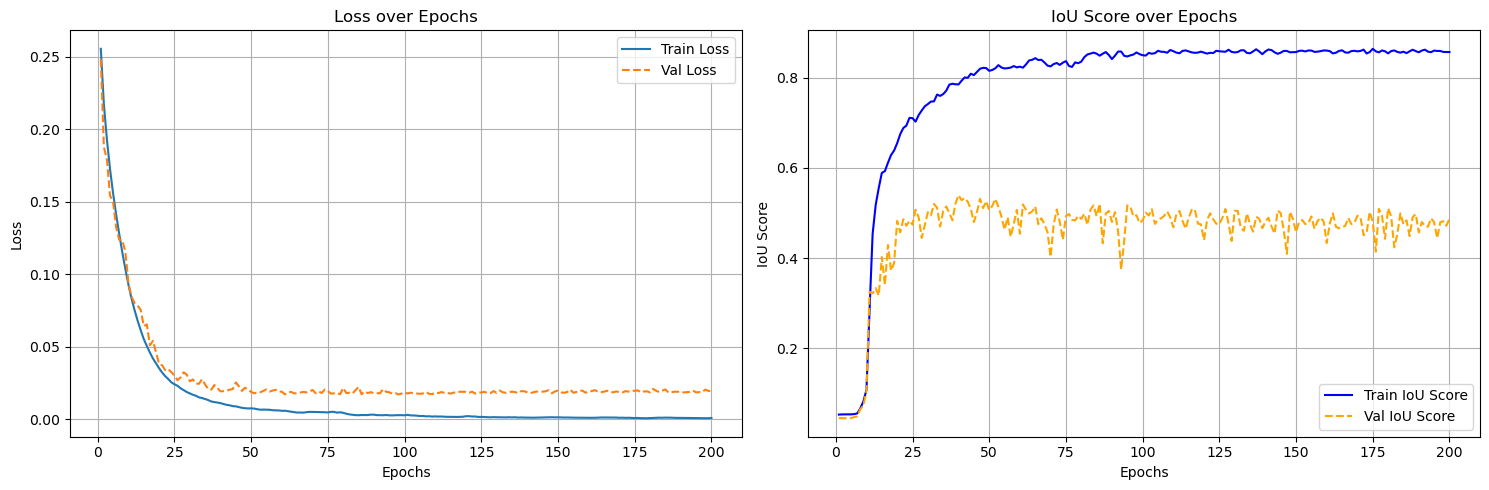

In [33]:
# plot the training and validaiton data
plotResult.plotLoss_IOU(loss_df, iou_sore_df, loss_val_df, iou_score_val_df)

In [34]:
 # join the list of prediction lists 
predictions = list(chain(*prediction_batch))
predictions_val = list(chain(*prediction_batch_val))

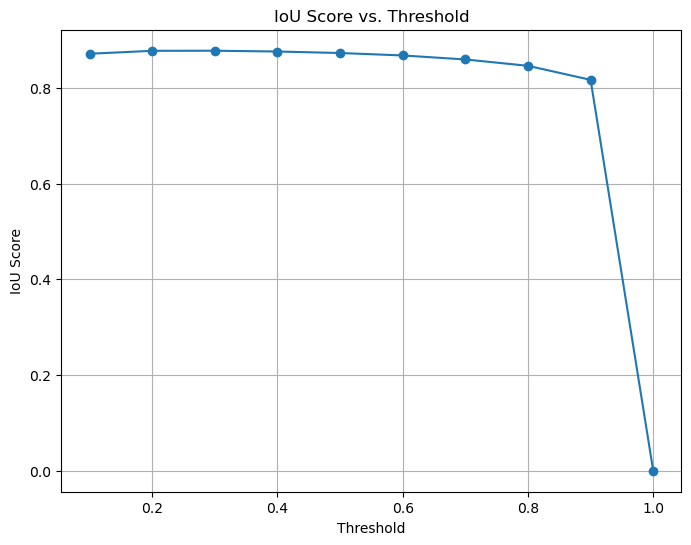

In [13]:
# check for optimal threshold for deciding the threshold for training
if train_flag:
    # compute an optimal threshold
    iou_vs_thresh = agent.optimalThresVsIoU(train_loader, predictions)
    plotOptimalThresh(iou_vs_thresh)

P088 SAGIR_020.jpg


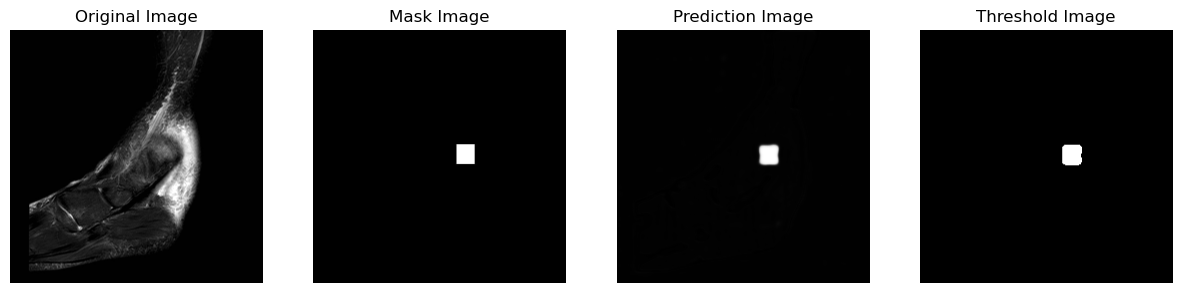

P089 SAGIR_012.jpg


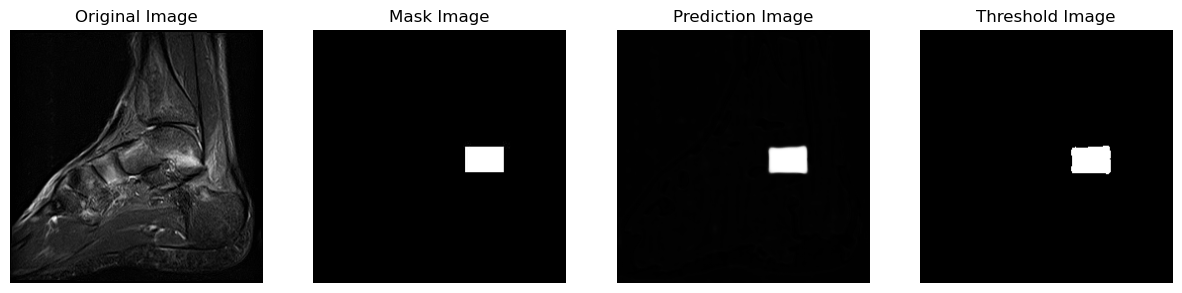

P047 SAGIR_014.jpg


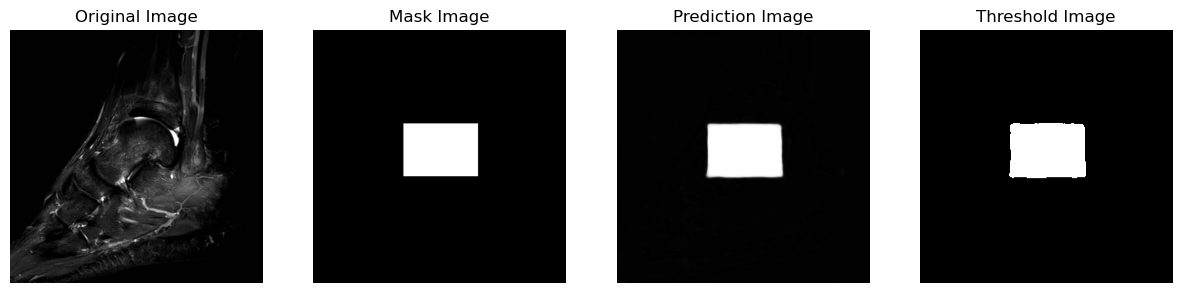

P009 SAGIR_013.jpg


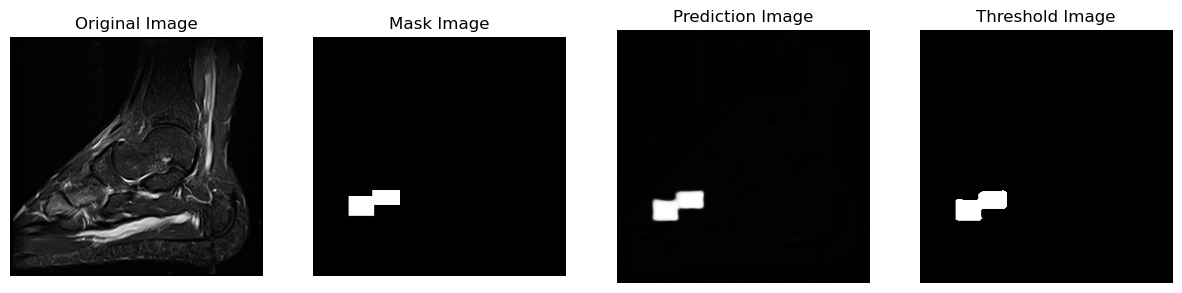

P034 SAGIR_012.jpg


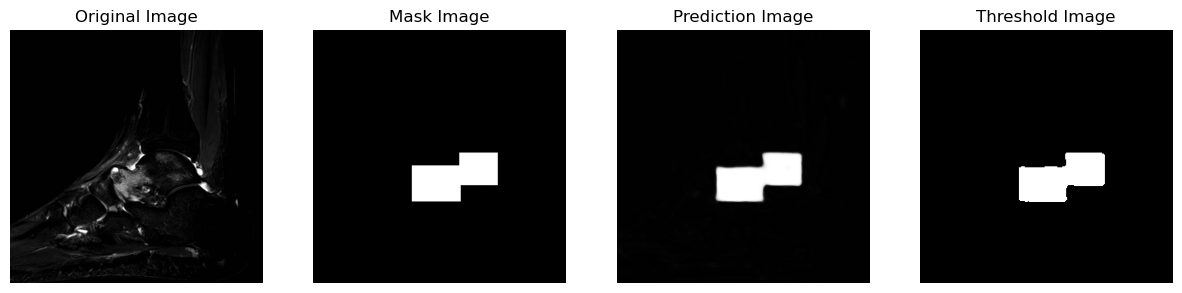

P023 SAGIR_012.jpg


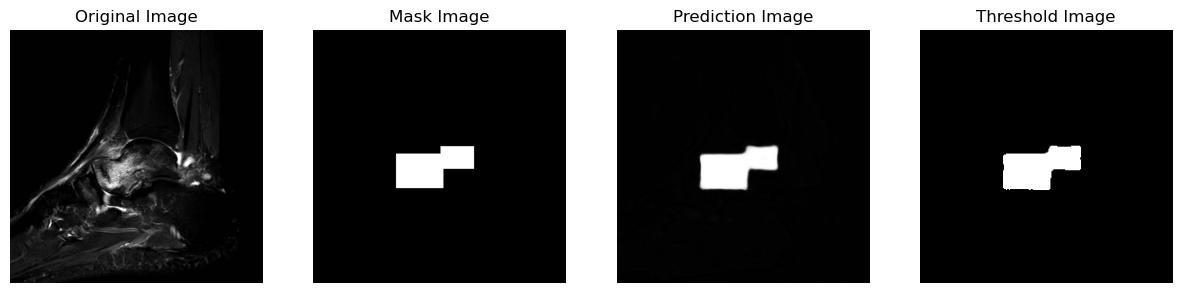

P079 SAGIR_004.jpg


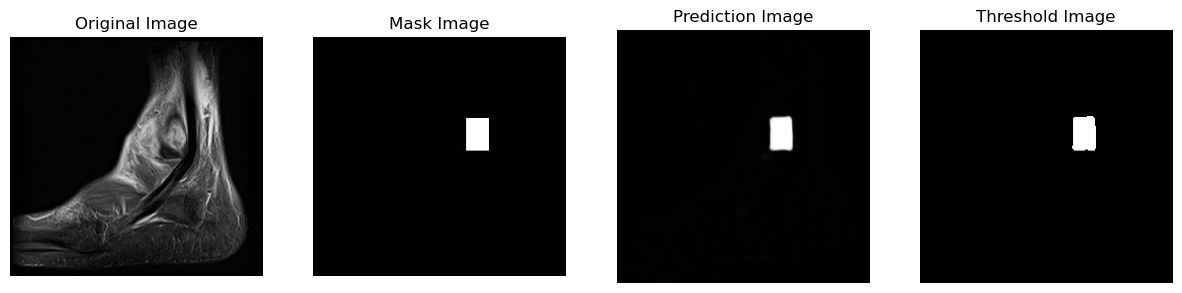

P050 SAGIR_014.jpg


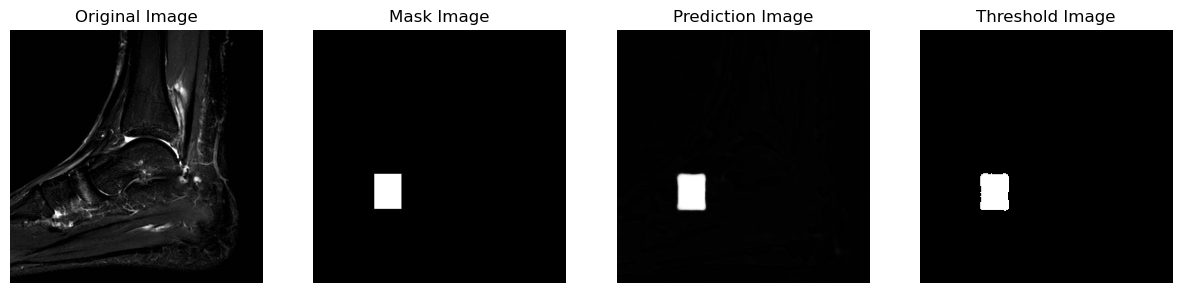

P036 SAGIR_018.jpg


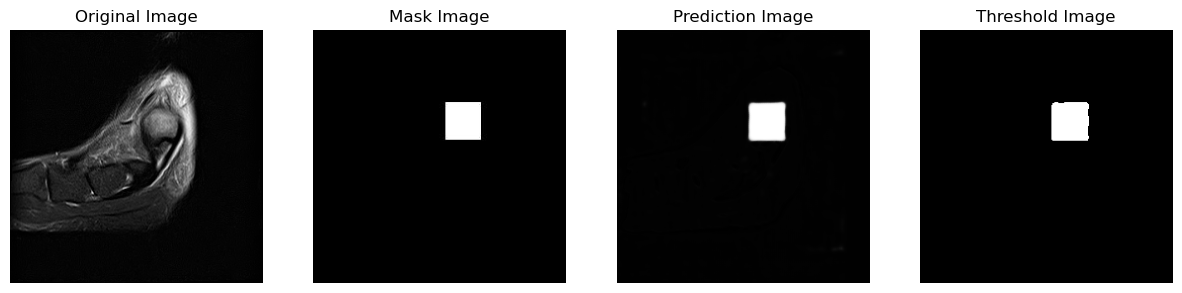

P050 SAGIR_015.jpg


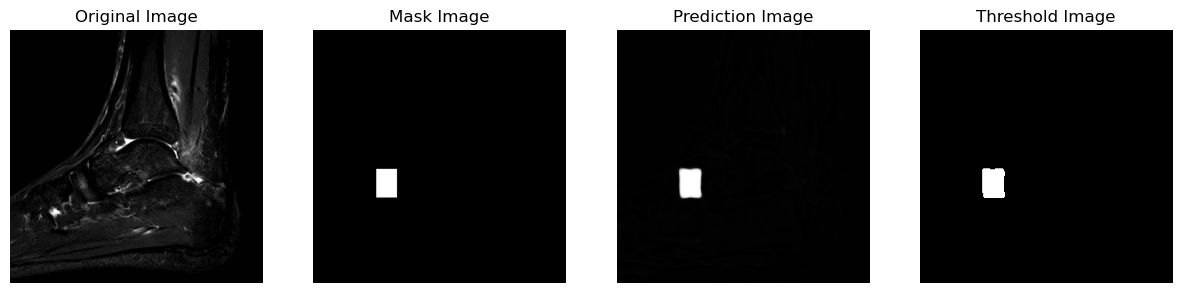

In [14]:
# writ the data
if train_flag:
    # plot few results
    agent.printPrediction(loader=train_loader, preds=predictions)


P055 SAGIR_009.jpg


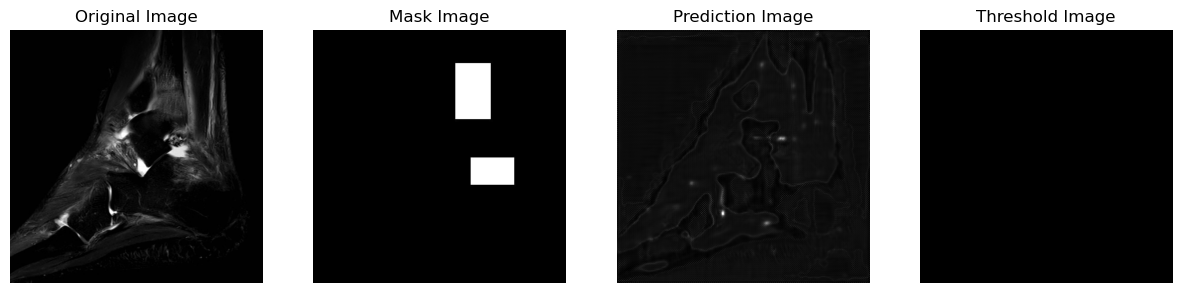

P051 SAGIR_008.jpg


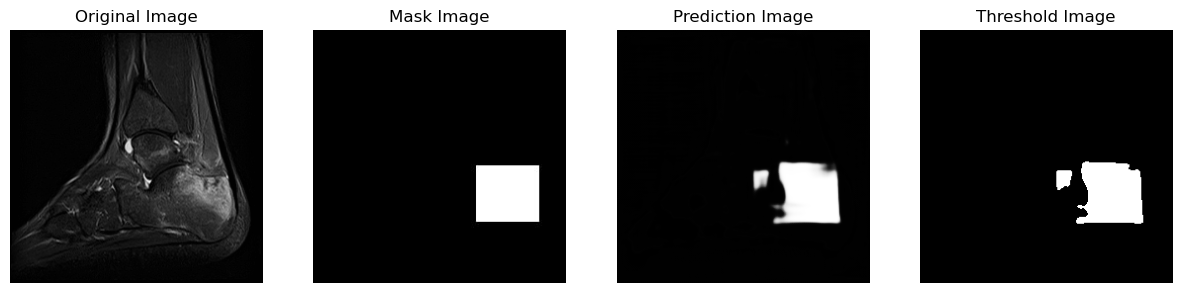

P051 SAGIR_009.jpg


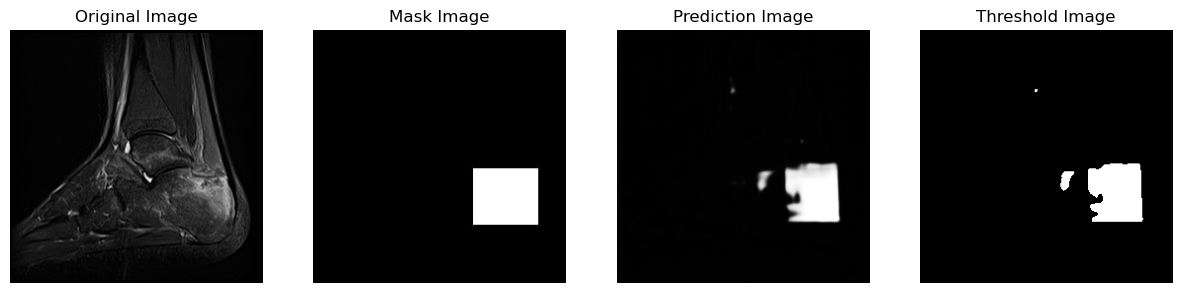

P055 SAGIR_008.jpg


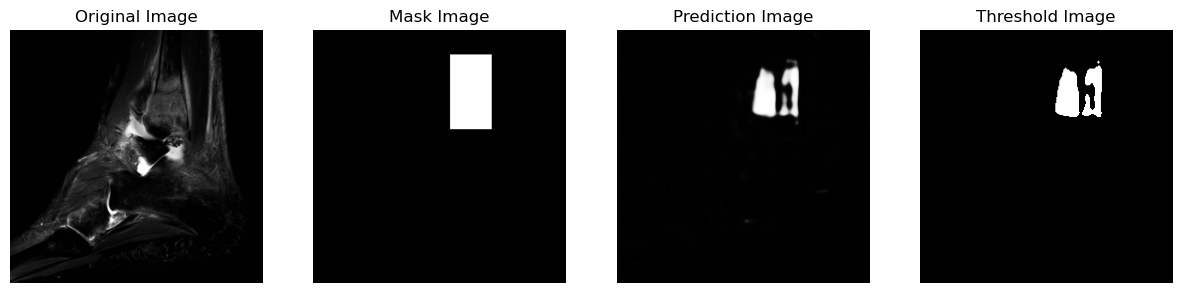

P031 SAGIR_018.jpg


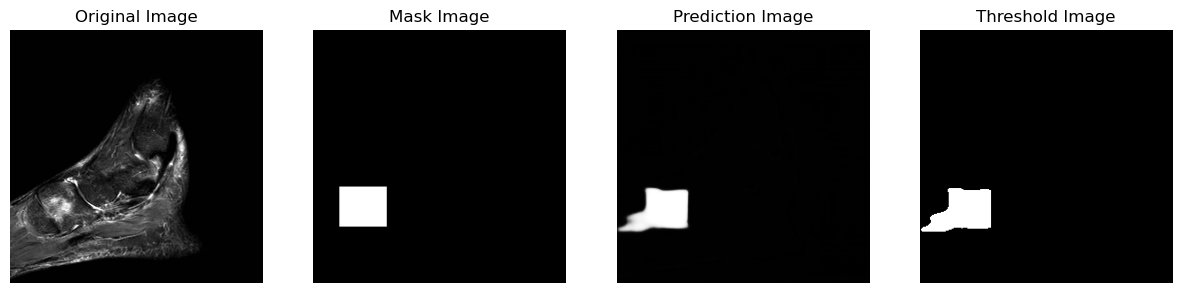

P031 SAGIR_019.jpg


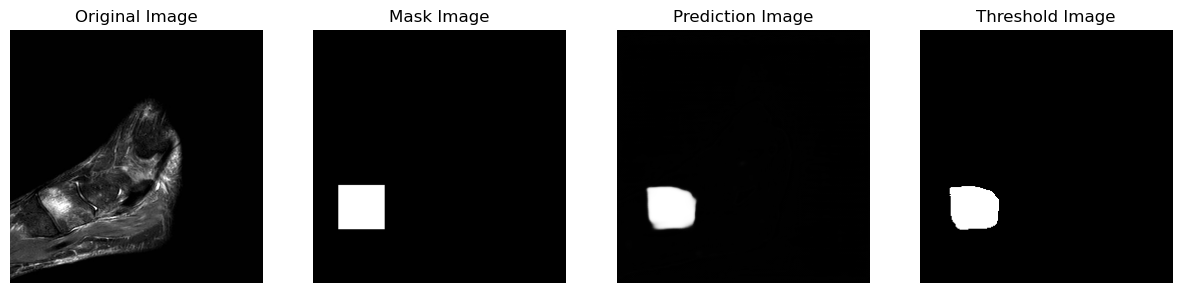

P096 SAGIR_009.jpg


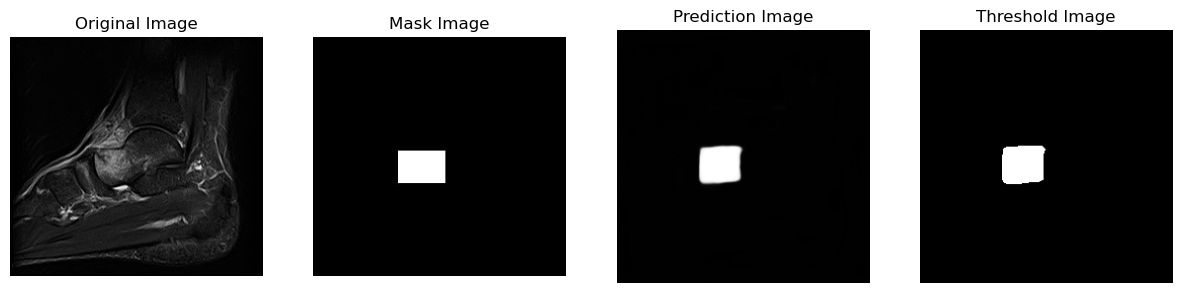

P003 SAGIR_017.jpg


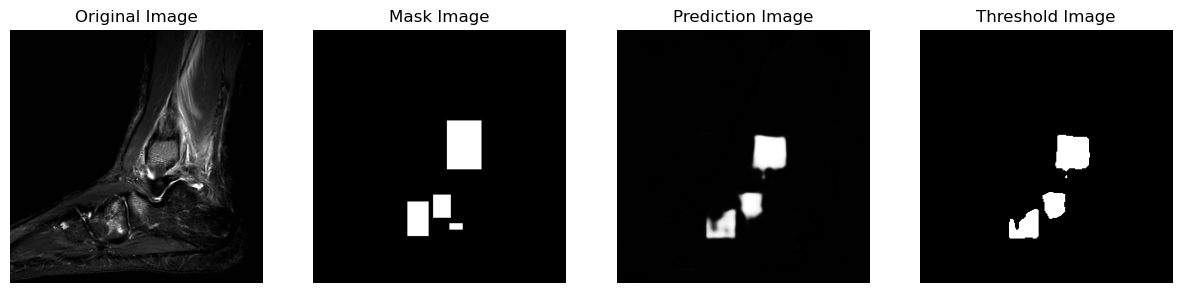

P094 SAGIR_016.jpg


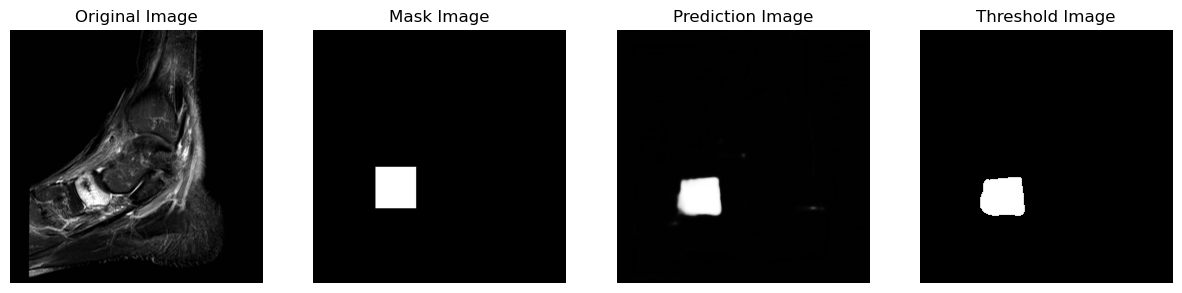

P093 SAGIR_006.jpg


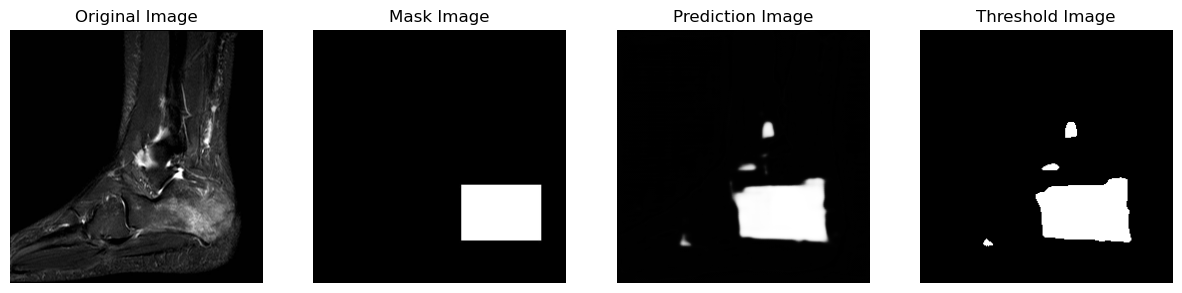

In [39]:
# Print few validation results
# plot few results
agent.printPrediction(loader=val_loader, preds=predictions_val, idx=10, validation=True)

In [130]:
# write the data to the files and save the net
w_path = os.path.join(folder_path,"Result","IoUScore.csv")
agent.writeRun(iou_sore_df,w_path)

# write the loss data
w_path = os.path.join(folder_path,"Result","LossOutput.csv")
agent.writeRun(loss_df,w_path)

# save the net
agent.save_net(file_name='UNet1')

In [131]:
train_flag = False

# set the directories
test_dir = test_dir_dict[img]
mask_dir_test = test_mask_dir_dict[img]

# initialize the agent , pass the batchSize as the no.of images in the test , state as old to initialize existing model
agent_test = Agent.Agent(train_flag,img_dir=test_dir,msk_dir=mask_dir_test,folder_path=folder_path, state='old',num_epochs=1, batchSize=186, bilinear=False)
agent_test.initializeUnet('UNet1Jun 27, 2024 07_17PM')

test_loader = agent_test.loadCustomData()

mps
Initialize Custom Data
Train flag:: False
loader root directory:: /Users/jiten/Masters/WorkPlace/MRI Fractures Project/test_data_SAGIR
Total Size ::: 185


0.41671682490500467
Iou Score ::::0.41671682490500467
185


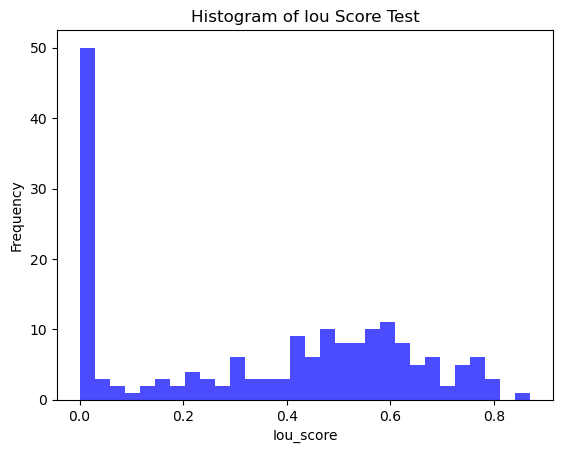

In [132]:
# run the model for test and check the iou and histogram
prediction_batch_test, iou_score_batch_test, iou_score_each_test = agent_test.runModel(test_loader)
print(len(iou_score_each_test))
# plot the testing iou histogram
plotResult.plotTest_IOU(iou_score_each_test)

### Train experiment with Data Augmentation

In [95]:
# initialize agent
agent_aug = Agent.Agent(train_flag,img_dir=train_dir,msk_dir=mask_dir,folder_path=folder_path, val_dir=val_dir, msk_dir_val=mask_dir_val, 
                state='new', num_epochs=200, batchSize=30, bilinear=False)
agent_aug.initializeUnet()

# load custom dataset
train_loader, val_loader = agent_aug.loadCustomData(agument=True)

mps
Initialize Custom Data
Augmentation Initialized
Train flag:: True
loader root directory:: /Users/jiten/Masters/WorkPlace/MRI Fractures Project/train_data_SAGIR
Total Size ::: 1118
Initialize Custom Data
Total Size val::: 116


In [96]:
# rum the model fwith the augmented data
loss_aug_df, prediction_aug_batch, iou_sore_aug_df, loss_aug_val_df, iou_score_aug_val_df, prediction__aug_batch_val = agent_aug.runModel(train_loader, val_loader)

Epoch [1/200], Train( Loss: 0.2213, IoU_score: 0.0537 ) ::: Validation ( Loss: 0.1882, IoU_score: 0.0454 )
Epoch [2/200], Train( Loss: 0.1613, IoU_score: 0.0539 ) ::: Validation ( Loss: 0.1483, IoU_score: 0.0460 )
Epoch [3/200], Train( Loss: 0.1321, IoU_score: 0.0604 ) ::: Validation ( Loss: 0.1108, IoU_score: 0.0737 )
Epoch [4/200], Train( Loss: 0.1076, IoU_score: 0.0986 ) ::: Validation ( Loss: 0.0985, IoU_score: 0.0751 )
Epoch [5/200], Train( Loss: 0.0883, IoU_score: 0.1298 ) ::: Validation ( Loss: 0.0813, IoU_score: 0.1045 )
Epoch [6/200], Train( Loss: 0.0736, IoU_score: 0.2724 ) ::: Validation ( Loss: 0.0701, IoU_score: 0.2798 )
Epoch [7/200], Train( Loss: 0.0612, IoU_score: 0.4311 ) ::: Validation ( Loss: 0.0580, IoU_score: 0.2861 )
Epoch [8/200], Train( Loss: 0.0518, IoU_score: 0.4915 ) ::: Validation ( Loss: 0.0483, IoU_score: 0.4100 )
Epoch [9/200], Train( Loss: 0.0448, IoU_score: 0.5179 ) ::: Validation ( Loss: 0.0448, IoU_score: 0.3184 )
Epoch [10/200], Train( Loss: 0.0396, 

In [97]:
 # join the list of prediction lists 
predictions_aug = list(chain(*prediction_aug_batch))
predictions_aug_val = list(chain(*prediction__aug_batch_val))

P096 SAGIR_009.jpg


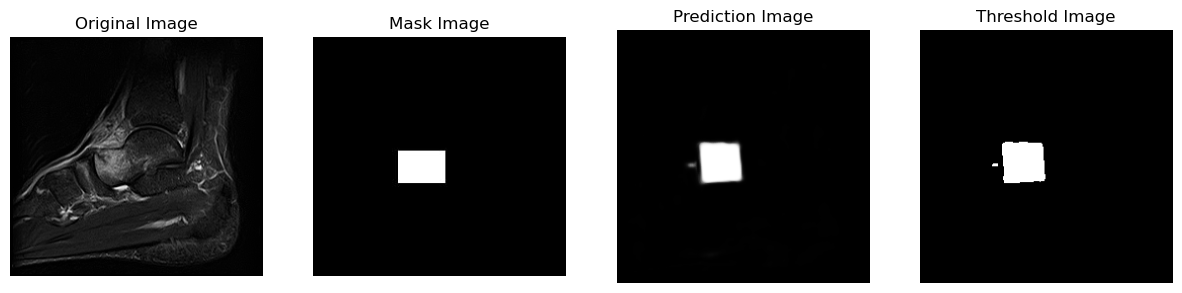

P003 SAGIR_017.jpg


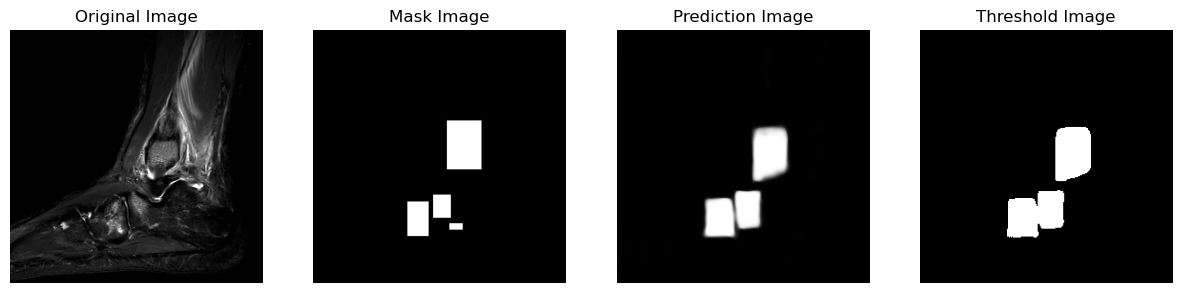

P094 SAGIR_016.jpg


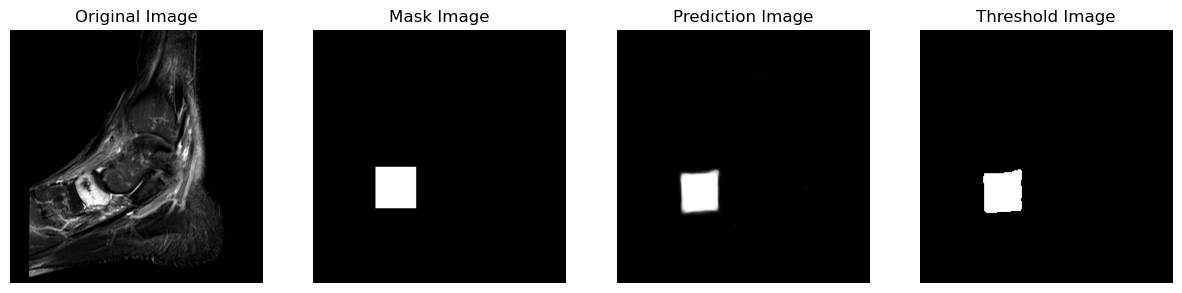

P093 SAGIR_006.jpg


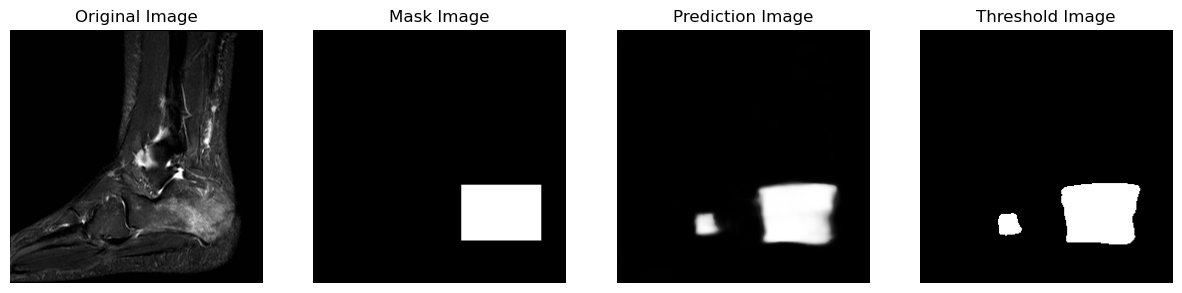

P074 SAGIR_010.jpg


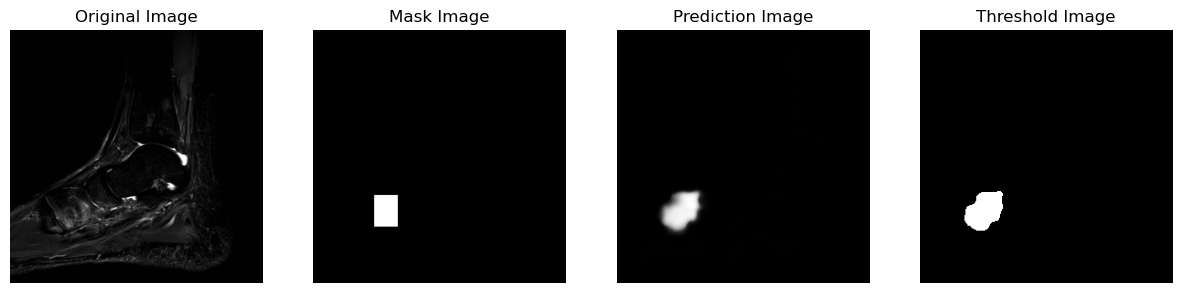

P093 SAGIR_012.jpg


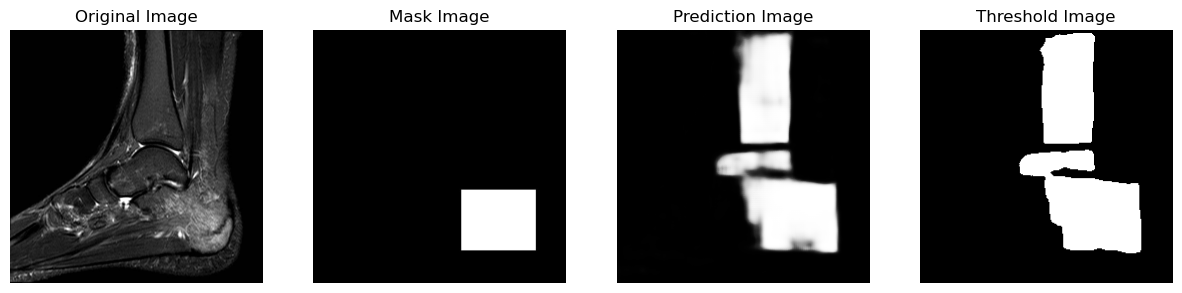

P007 SAGIR_016.jpg


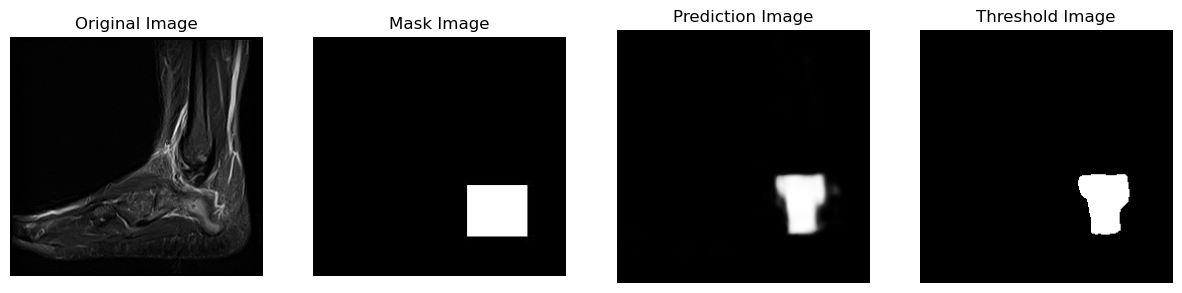

P004 SAGIR_013.jpg


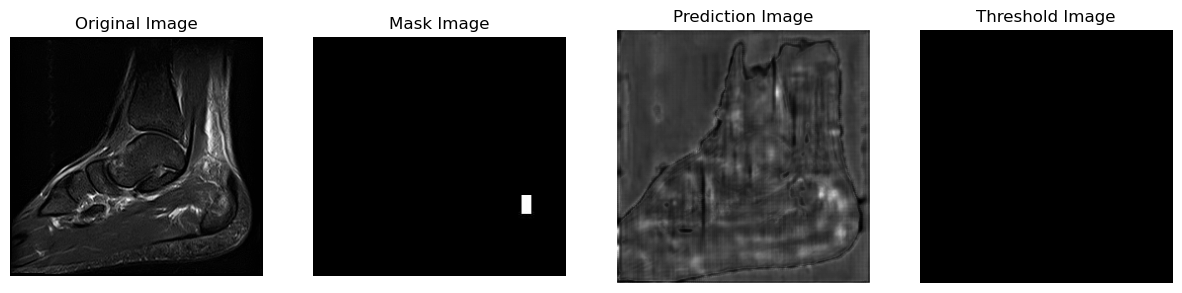

P004 SAGIR_012.jpg


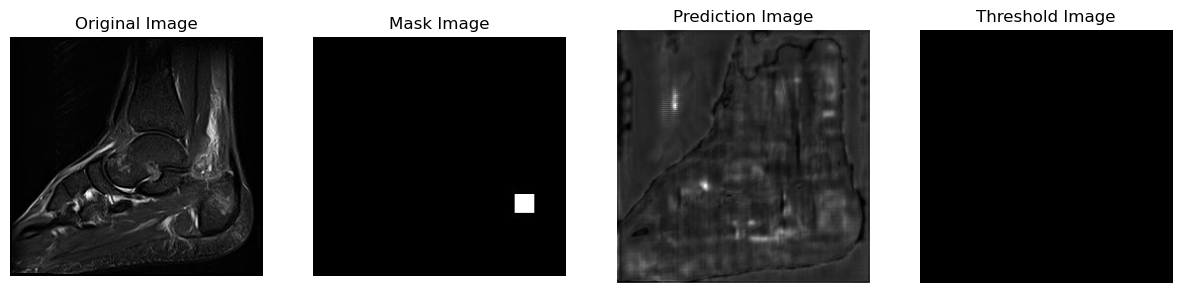

P093 SAGIR_013.jpg


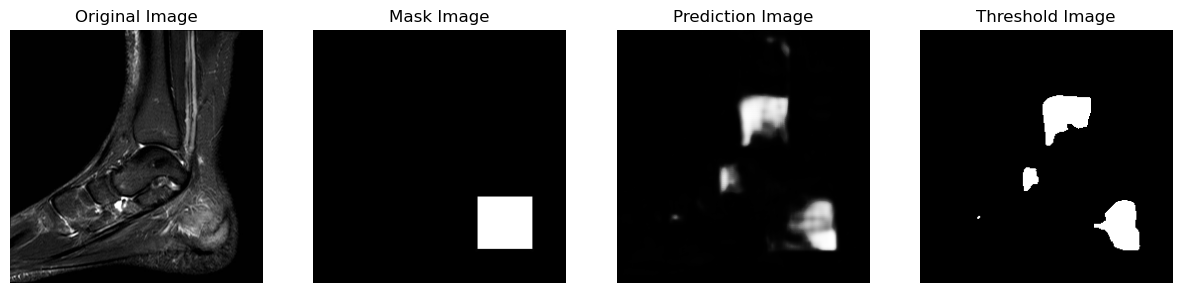

In [107]:
 # plot few results
agent_aug.printPrediction(loader=val_loader, idx=16, preds=predictions_aug_val, validation=True)

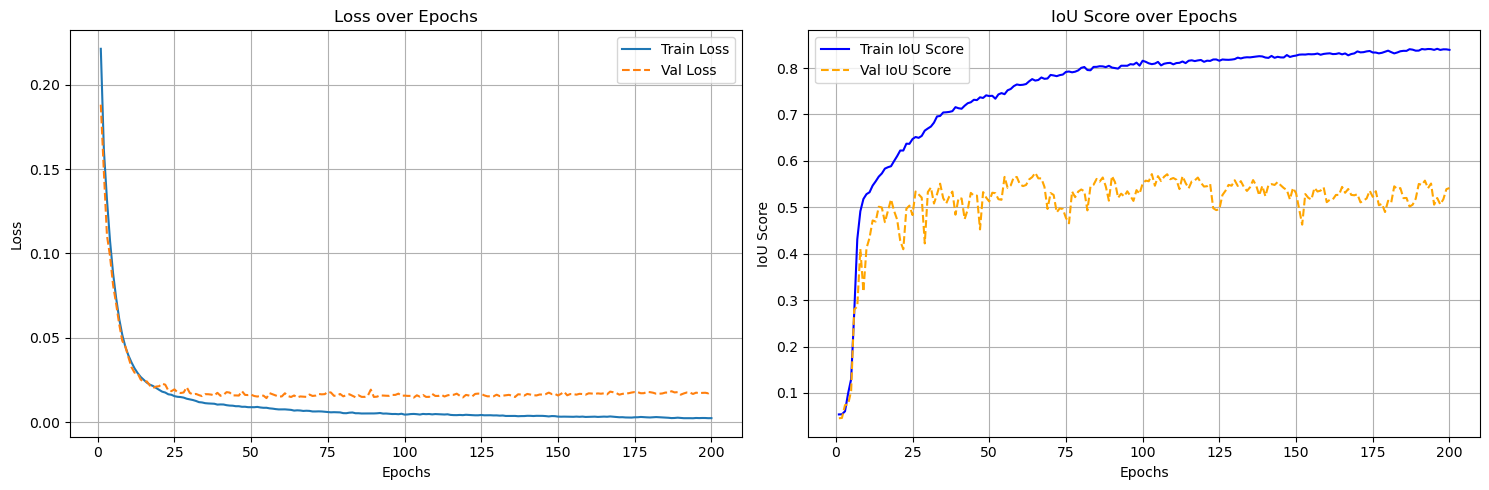

In [104]:
# plot the training and validaiton data
plotResult.plotLoss_IOU(loss_aug_df, iou_sore_aug_df, loss_aug_val_df, iou_score_aug_val_df)

In [108]:
# write the data to the files and save the net
w_path = os.path.join(folder_path,"Result","IoUScore_aug.csv")
agent_aug.writeRun(iou_sore_aug_df,w_path)

# write the loss data
w_path = os.path.join(folder_path,"Result","LossOutput_aug.csv")
agent_aug.writeRun(loss_aug_df,w_path)

# save the net
agent_aug.save_net(file_name='UNet')

### Test the Model with the model trained with augmented data

In [133]:
train_flag = False

# set the directories
#test_dir = test_dir_dict[img]
#mask_dir_test = test_mask_dir_dict[img]

# initialize the agent , pass the batchSize as the no.of images in the test , state as old to initialize existing model
agent_test = Agent.Agent(train_flag,img_dir=test_dir,msk_dir=mask_dir_test,folder_path=folder_path, state='old',num_epochs=1, batchSize=186, bilinear=False)
agent_test.initializeUnet('UNetJun 27, 2024 01_38PM')

test_loader = agent_test.loadCustomData()

mps
Initialize Custom Data
Train flag:: False
loader root directory:: /Users/jiten/Masters/WorkPlace/MRI Fractures Project/test_data_SAGIR
Total Size ::: 185


0.513969881120455
Iou Score ::::0.513969881120455
185


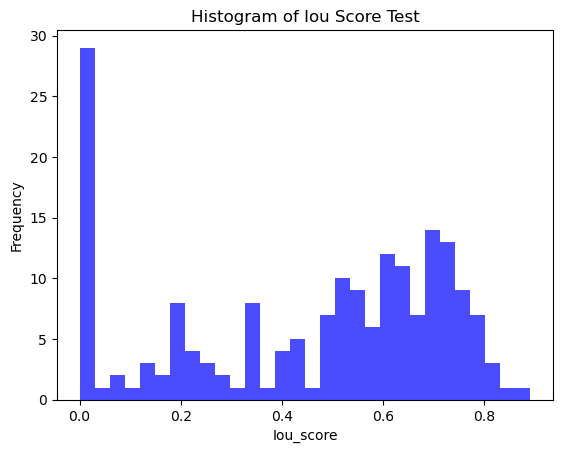

In [134]:

prediction_batch_test, iou_score_batch_test, iou_score_each_test = agent_test.runModel(test_loader)
print(len(iou_score_each_test))
# plot the testing iou histogram
plotResult.plotTest_IOU(iou_score_each_test)

In [135]:
# join the predictions of the test
predictions_test = list(chain(*prediction_batch_test))

P024 SAGIR_016.jpg


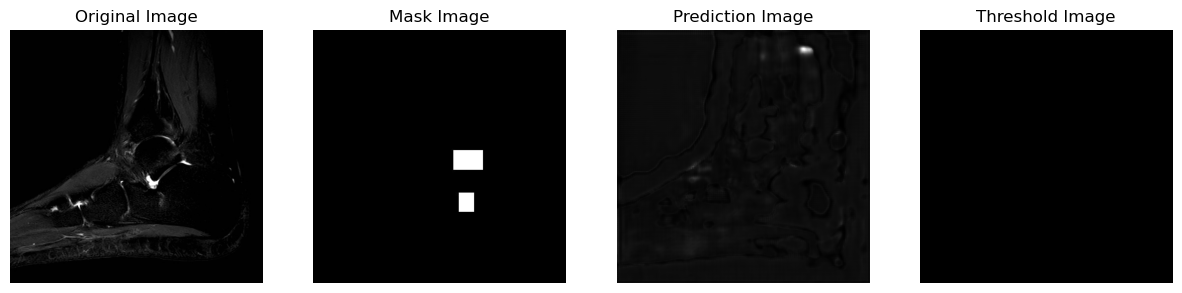

P057 SAGIR_010.jpg


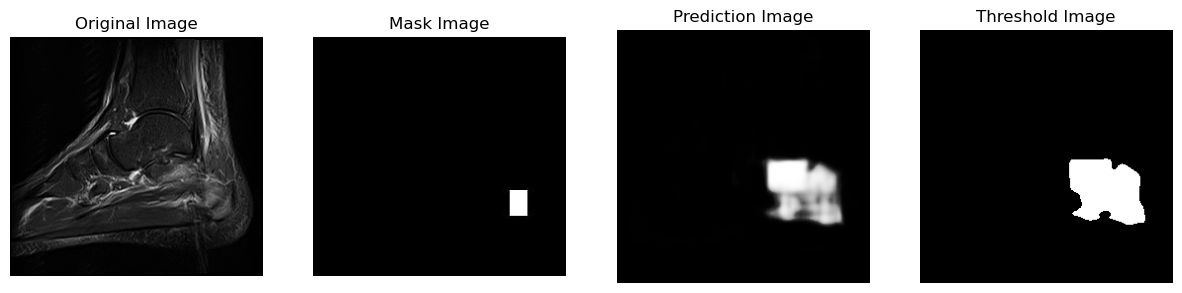

P027 SAGIR_007.jpg


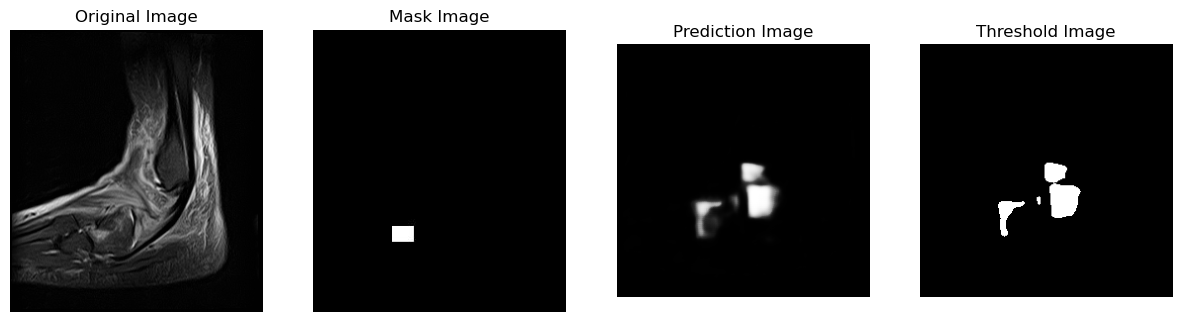

P027 SAGIR_013.jpg


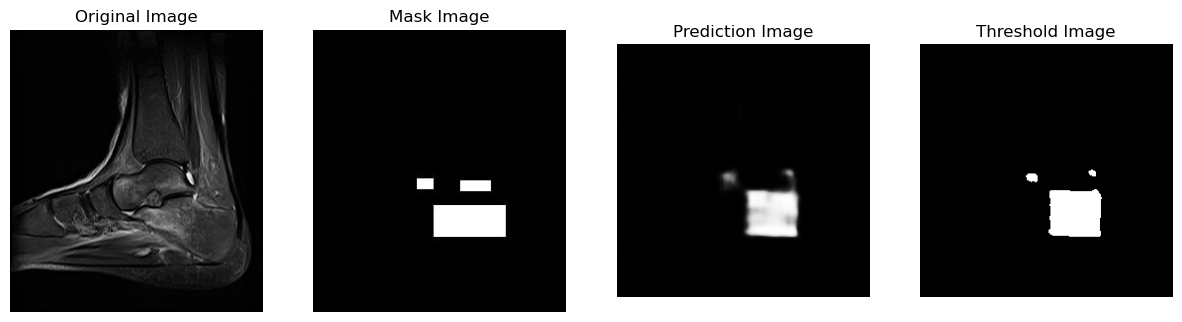

P035 SAGIR_008.jpg


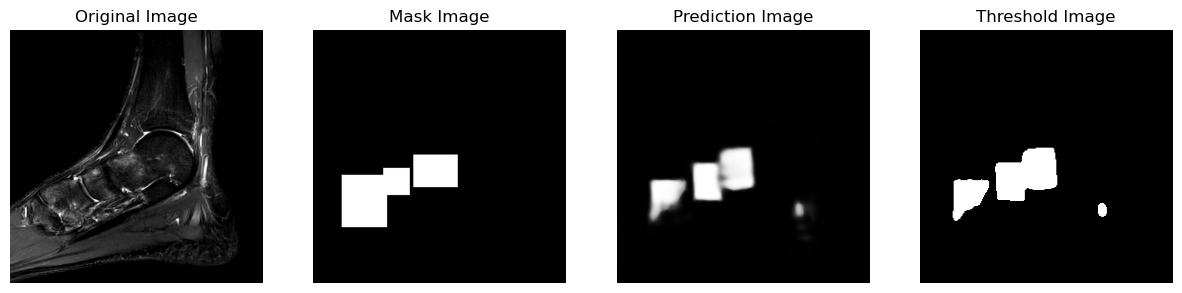

P020 SAGIR_017.jpg


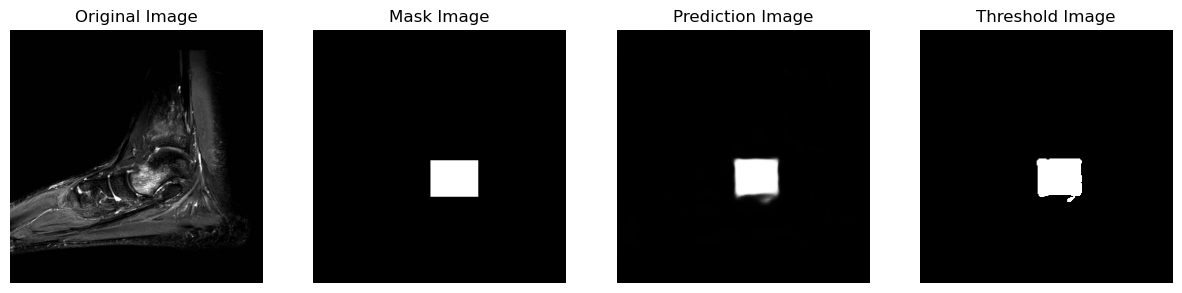

P053 SAGIR_011.jpg


P044 SAGIR_011.jpg


P044 SAGIR_005.jpg


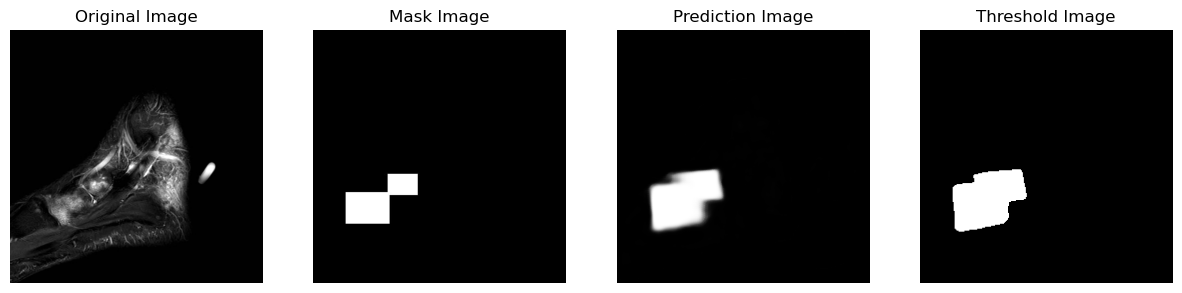

P044 SAGIR_010.jpg


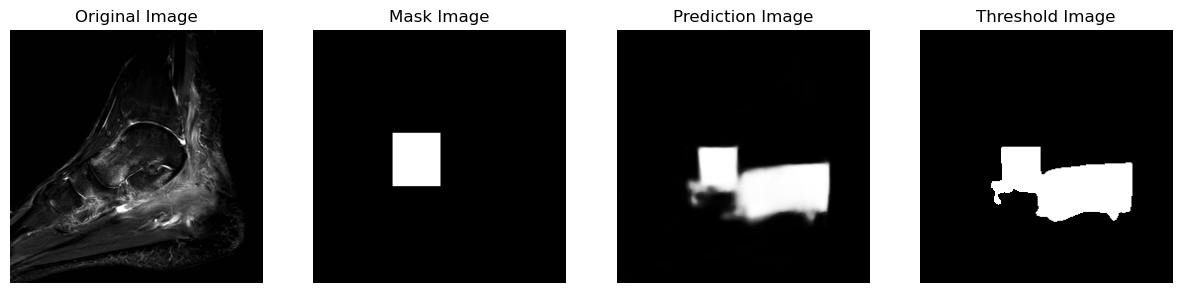

In [136]:

# plot few results
agent_test.printPrediction(loader=test_loader, idx=0, preds=predictions_test)

#agent.savePredictions(loader=test_loader, predictions=predictions)

### Train with L2 Regularization (Weighted Decay) with early stopping

In [146]:
train_flag = True

 # initialize agent
agent_l2 = Agent.Agent(train_flag,img_dir=train_dir,msk_dir=mask_dir,folder_path=folder_path, val_dir=val_dir, msk_dir_val=mask_dir_val, 
                  state='new', num_epochs=200, batchSize=30, bilinear=False)
agent_l2.initializeUnet()

# load custom dataset
train_loader_l2, val_loader_l2 = agent_l2.loadCustomData()

mps
Initialize Custom Data
Train flag:: True
loader root directory:: /Users/jiten/Masters/WorkPlace/MRI Fractures Project/train_data_SAGIR
Total Size ::: 559
Initialize Custom Data
Total Size val::: 116


In [147]:
# run the model
loss_df_l2, prediction_batch_l2, iou_sore_df_l2, loss_val_df_l2, iou_score_val_df_l2, prediction_batch_val_l2 = agent_l2.runModel(train_loader, val_loader, L2Reg=True)

Epoch [1/200], Train( Loss: 0.1737, IoU_score: 0.0536 ) ::: Validation ( Loss: 0.1305, IoU_score: 0.0455 )
Epoch [2/200], Train( Loss: 0.1279, IoU_score: 0.0586 ) ::: Validation ( Loss: 0.1159, IoU_score: 0.0510 )
Epoch [3/200], Train( Loss: 0.1015, IoU_score: 0.1207 ) ::: Validation ( Loss: 0.0918, IoU_score: 0.0813 )
Epoch [4/200], Train( Loss: 0.0807, IoU_score: 0.3266 ) ::: Validation ( Loss: 0.0739, IoU_score: 0.0985 )
Epoch [5/200], Train( Loss: 0.0652, IoU_score: 0.4520 ) ::: Validation ( Loss: 0.0572, IoU_score: 0.4057 )
Epoch [6/200], Train( Loss: 0.0524, IoU_score: 0.4965 ) ::: Validation ( Loss: 0.0532, IoU_score: 0.0483 )
Epoch [7/200], Train( Loss: 0.0435, IoU_score: 0.5181 ) ::: Validation ( Loss: 0.0468, IoU_score: 0.1006 )
Epoch [8/200], Train( Loss: 0.0370, IoU_score: 0.5347 ) ::: Validation ( Loss: 0.0456, IoU_score: 0.0063 )
Epoch [9/200], Train( Loss: 0.0325, IoU_score: 0.5405 ) ::: Validation ( Loss: 0.0365, IoU_score: 0.2464 )
Epoch [10/200], Train( Loss: 0.0288, 

In [148]:
# plot the training and validaiton data
plotResult.plotLoss_IOU(loss_df_l2, iou_sore_df_l2, loss_val_df_l2, iou_score_val_df_l2)

In [149]:
# write the data to the files and save the net
w_path = os.path.join(folder_path,"Result","IoUScore_l2.csv")
agent_l2.writeRun(iou_sore_df_l2,w_path)

# write the loss data
w_path = os.path.join(folder_path,"Result","LossOutput_l2.csv")
agent_l2.writeRun(loss_df_l2,w_path)

# save the net
agent_l2.save_net(file_name='UNet_l2')

### Test this saved model

In [150]:
train_flag = False

# set the directories
#test_dir = test_dir_dict[img]
#mask_dir_test = test_mask_dir_dict[img]

# initialize the agent , pass the batchSize as the no.of images in the test , state as old to initialize existing model
agent_test_l2 = Agent.Agent(train_flag,img_dir=test_dir,msk_dir=mask_dir_test,folder_path=folder_path, state='old',num_epochs=1, batchSize=186, bilinear=False)
agent_test_l2.initializeUnet('UNet_l2Jun 27, 2024 11_51PM')

test_loader_l2 = agent_test_l2.loadCustomData()

mps
Initialize Custom Data
Train flag:: False
loader root directory:: /Users/jiten/Masters/WorkPlace/MRI Fractures Project/test_data_SAGIR
Total Size ::: 185


In [151]:
prediction_batch_test_l2, iou_score_batch_test_l2, iou_score_each_test_l2 = agent_test_l2.runModel(test_loader_l2)
print(len(iou_score_each_test_l2))
# plot the testing iou histogram
plotResult.plotTest_IOU(iou_score_each_test_l2)

0.5141359859313612
Iou Score ::::0.5141359859313612
185


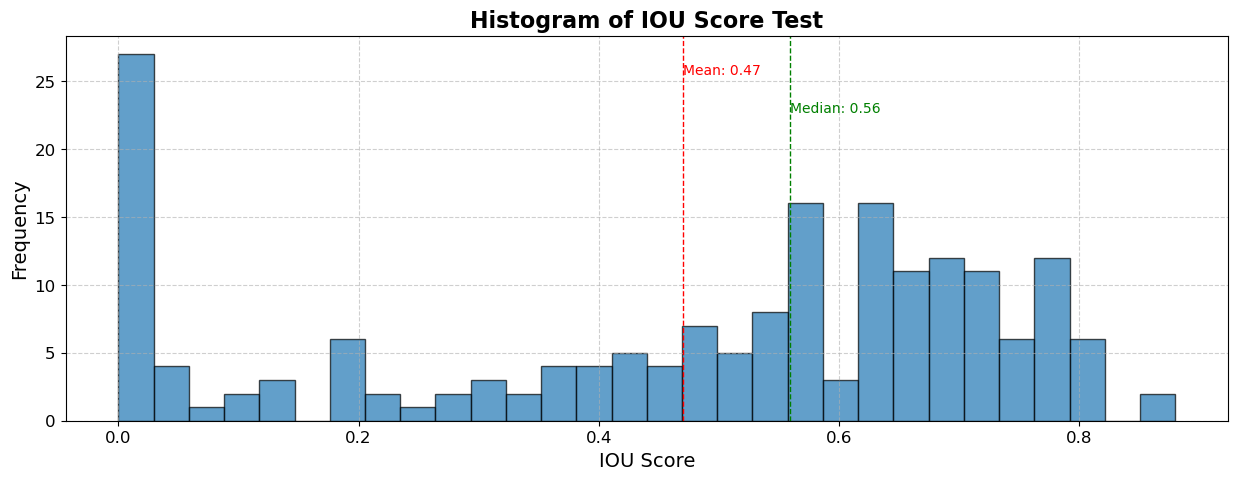

In [158]:
plotResult.plotTest_IOU(iou_score_each_test_l2)

In [152]:
# join the predictions of the test
predictions_test_l2 = list(chain(*prediction_batch_test_l2))

P024 SAGIR_016.jpg


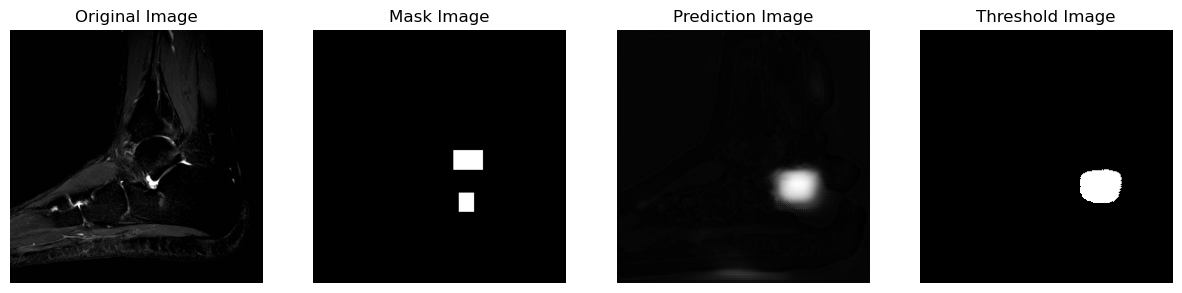

P057 SAGIR_010.jpg


P027 SAGIR_007.jpg


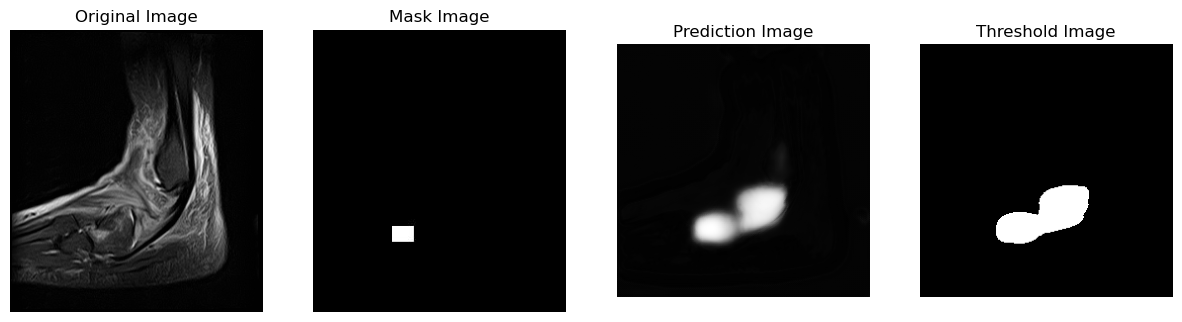

P027 SAGIR_013.jpg


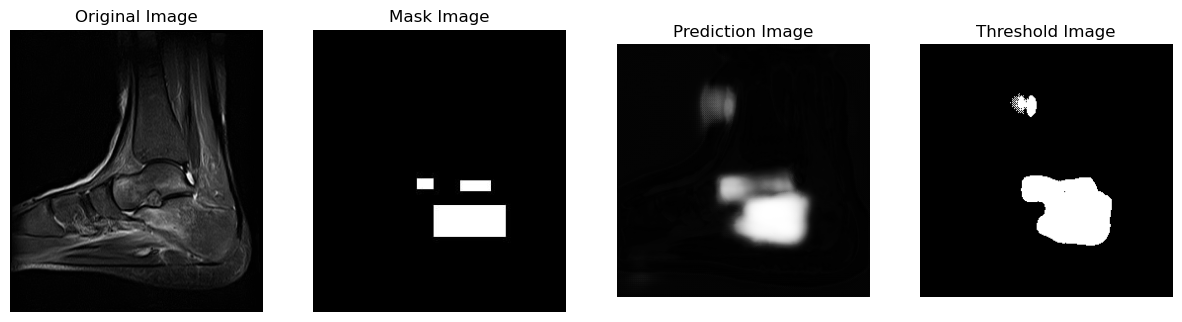

P035 SAGIR_008.jpg


P020 SAGIR_017.jpg


P053 SAGIR_011.jpg


P044 SAGIR_011.jpg


P044 SAGIR_005.jpg


P044 SAGIR_010.jpg


In [153]:
# plot few results
agent_test_l2.printPrediction(loader=test_loader_l2, idx=0, preds=predictions_test_l2)